# Data Analysis & Visualisation

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_books = pd.read_csv('books_1.Best_Books_Ever.csv')

## Dataset description & analysis

| Attributes  | Definition | Completeness |
| ------------- | ------------- | ------------- | 
| bookId  | Book Identifier as in goodreads.com  | 100 |
| title  | Book title | 100 |
| series | Series Name | 45 |
| author | Book's Author | 100 |
| rating | Global goodreads rating | 100 |
| description | Book's description | 97 |
| language | Book's language | 93 |
| isbn | Book's ISBN | 92 |
| genres | Book's genres | 91 |
| characters | Main characters | 26 |
| bookFormat | Type of binding | 97 |
| edition | Type of edition (ex. Anniversary Edition) | 9 |
| pages | Number of pages | 96 |
| publisher | Editorial | 93 |
| publishDate | publication date | 98 |
| firstPublishDate | Publication date of first edition | 59 |
| awards | List of awards | 20 |
| numRatings | Number of total ratings | 100 |
| ratingsByStars | Number of ratings by stars | 97 |
| likedPercent | Derived field, percent of ratings over 2 starts (as in GoodReads) | 99 |
| setting | Story setting | 22 |
| coverImg | URL to cover image | 99 |
| bbeScore | Score in Best Books Ever list | 100 |
| bbeVotes | Number of votes in Best Books Ever list | 100 |
| price | Book's price (extracted from Iberlibro) | 73 |

In [3]:
df_books.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

In [4]:
df_books.isnull().sum()

bookId                  0
title                   0
series              29008
author                  0
rating                  0
description          1338
language             3806
isbn                    0
genres                  0
characters              0
bookFormat           1473
edition             47523
pages                2347
publisher            3696
publishDate           880
firstPublishDate    21326
awards                  0
numRatings              0
ratingsByStars          0
likedPercent          622
setting                 0
coverImg              605
bbeScore                0
bbeVotes                0
price               14365
dtype: int64

In [5]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

## Data Viz & Preprocessing

In [6]:
df = df_books.copy()
df = df.drop(['series', 'edition', 'firstPublishDate', 'price', 'publisher', 'bbeScore', 'bbeVotes', 'setting', 'awards'], axis=1)
df['author'] = df['author'].str.split(',').str[0]
def remove_dup(dataframe):
    org_df = dataframe.drop_duplicates()
    return org_df

def clean_data(dataframe):
    a = remove_dup(dataframe) #using the fxn to remove duplicates
    a = a.dropna(how = 'all') #drop the records that have ALL na values
    a = a.dropna(axis=1, how='all') #drop the columns that have ALL na values
    return a
df = clean_data(df)
df_top_20 = df[df['numRatings'] > 1000000]
df_top_20 = df_top_20.sort_values(by='rating', ascending=False)
df_top_20.head()

,bookId,title,author,rating,description,language,isbn,genres,characters,bookFormat,pages,publishDate,numRatings,ratingsByStars,likedPercent,coverImg
71,136251.Harry_Potter_and_the_Deathly_Hallows,Harry Potter and the Deathly Hallows,J.K. Rowling,4.62,Harry Potter is leaving Privet Drive for the l...,English,9780545010221,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Hardcover,759,07/21/07,2811637,"['2038930', '552014', '161906', '35042', '23745']",98.0,https://i.gr-assets.com/images/S/compressed.ph...
105,1.Harry_Potter_and_the_Half_Blood_Prince,Harry Potter and the Half-Blood Prince,J.K. Rowling,4.57,The war against Voldemort is not going well; e...,English,9999999999999,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Draco Malfoy', 'Ron Weasley', 'Petunia Dursl...",Paperback,652,09/16/06,2437658,"['1646703', '584575', '167461', '27277', '11642']",98.0,https://i.gr-assets.com/images/S/compressed.ph...
93,5.Harry_Potter_and_the_Prisoner_of_Azkaban,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,4.57,Harry Potter's third year at Hogwarts is full ...,English,9780439655484,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Mass Market Paperback,435,05/01/04,2806471,"['1892635', '668920', '205266', '27227', '12423']",99.0,https://i.gr-assets.com/images/S/compressed.ph...
103,6.Harry_Potter_and_the_Goblet_of_Fire,Harry Potter and the Goblet of Fire,J.K. Rowling,4.56,Harry Potter is midway through his training as...,English,9999999999999,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,734,09/28/02,2594622,"['1729403', '640440', '187274', '26301', '11204']",99.0,https://i.gr-assets.com/images/S/compressed.ph...
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,870,09/28/04,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,https://i.gr-assets.com/images/S/compressed.ph...


Top 20 rated books with number of ratings higher than 1 000 000. 

**Observation :** No book with rating of 5. We filtered on number of ratings because we want to avoid books with rating of 5 but with only one or two rate votes.

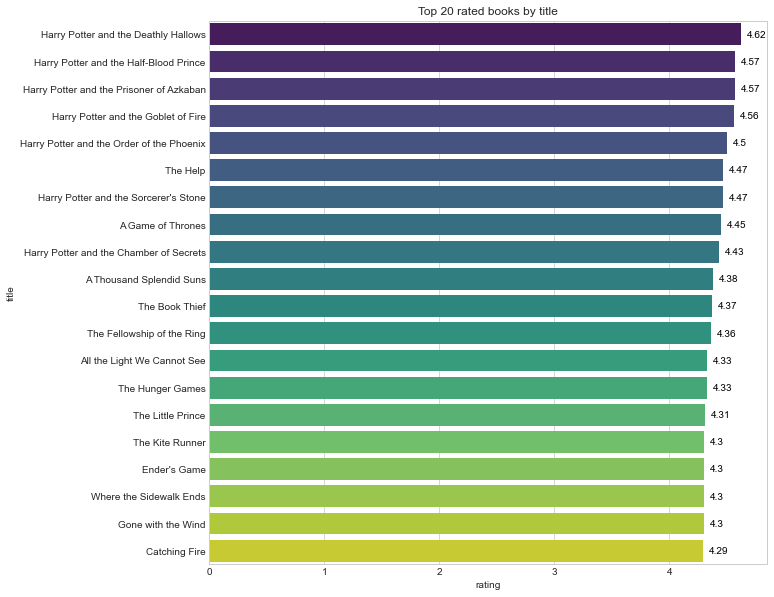

In [7]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))
plt.title("Top 20 rated books by title")
data = df_top_20.sort_values(by='rating', ascending=False).head(20)
gr = sns.barplot(x="rating", y="title", data=data, palette="viridis")

for i in gr.patches:
    gr.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

In [8]:
df_top_20_authors = df.groupby('author')['title'].count().reset_index().sort_values('title', ascending=False).head(20).set_index('author')
df_top_20_authors.head(20)

,title
author,
Nora Roberts (Goodreads Author),94
Stephen King (Goodreads Author),94
James Patterson (Goodreads Author),94
Agatha Christie,83
Anonymous,75
Erin Hunter,74
Terry Pratchett,63
Carolyn Keene,59
J.D. Robb (Goodreads Author),59


/Users/thor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


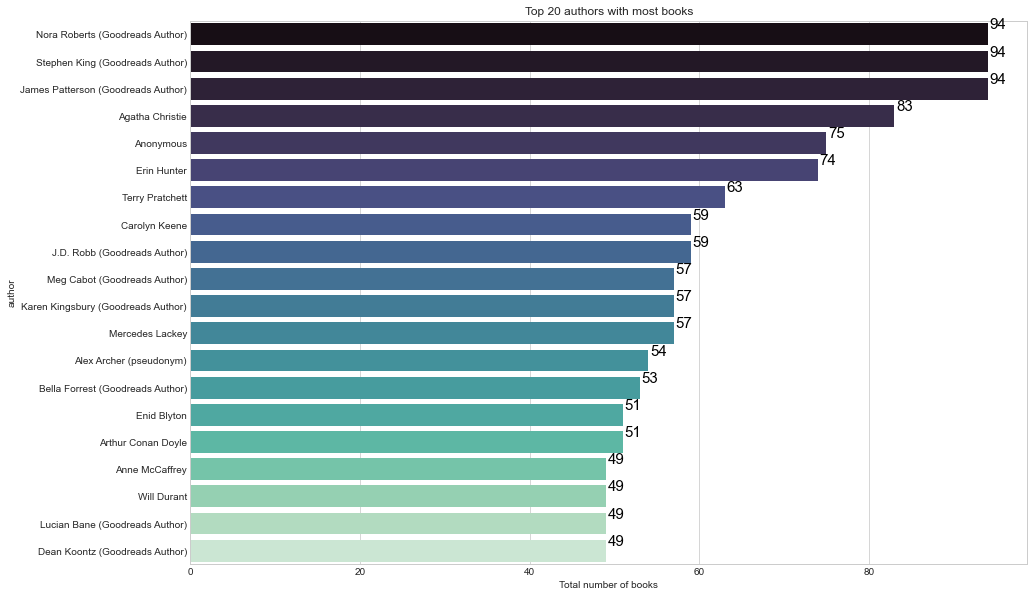

In [9]:
plt.figure(figsize=(15,10))
ax = sns.barplot(df_top_20_authors['title'], df_top_20_authors.index, palette='mako')

ax.set_title("Top 20 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

We can observe here that the authors with the most important number of books are authors from goordeads books program. The NOT A BOOK author is a profile that was created to segregate those items which have ISBNs but are not considered part of goodreads catalog.

In [10]:
df_filtered_by_votenum = df[df['numRatings'] > 25000]
df_filtered_by_votenum = df_filtered_by_votenum.drop(['likedPercent'], axis=1)
df_top_20_authors_most_rated = df_filtered_by_votenum[['author', 'rating']]
df_top_20_authors_most_rated = df_filtered_by_votenum.groupby('author').mean()
df_top_20_authors_most_rated['books_count'] = df_filtered_by_votenum.groupby('author')['title'].count()
df_top_20_authors_most_rated = df_top_20_authors_most_rated.sort_values(by='rating', ascending=False)
df_top_20_authors_most_rated.head(20)

,rating,numRatings,books_count
author,,,
Chanel Miller,4.710,55887.0,1
Bill Watterson,4.690,72469.2,5
Anthony Ray Hinton,4.620,32367.0,1
Andrew Williamson (Illustrations),4.610,38688.0,1
Charlie Mackesy,4.600,33404.0,1
Bryan Stevenson,4.600,143058.0,1
John Williams,4.550,66796.0,3
Michelle Obama (Goodreads Author),4.530,564220.0,1
Kelly Rimmer (Goodreads Author),4.510,44326.0,1


The most rated authors with books with num of ratings > 25000. 

In [11]:
df_top_20_authors_most_rated_with_min_books = df_top_20_authors_most_rated[df_top_20_authors_most_rated['books_count'] > 1]
df_top_20_authors_most_rated_with_min_books.sort_values(by='rating', ascending=False)

,rating,numRatings,books_count
author,,,
Bill Watterson,4.690000,72469.200000,5
John Williams,4.550000,66796.000000,3
Masashi Kishimoto,4.495000,91148.500000,2
Kate Egan,4.460000,75000.000000,3
Alice Oseman (Goodreads Author),4.446667,40416.000000,3
...,...,...,...
Alice Sebold,3.430000,713875.333333,3
Gregory Maguire,3.415000,171644.000000,4
Karen Joy Fowler,3.410000,85028.500000,2


The most rated authors with books with num of ratings > 25000 and with a books number > 2. Books can be attributed to "Anonymous" for several reasons:

* They are officially published under that name
* They are traditional stories not attributed to a specific author
* They are religious texts not generally attributed to a specific author

In [12]:
df_most_represented_genre = df[df['numRatings'] > 25000]
# df_most_represented_genre = df_most_represented_genre.groupby('genres')['title']
df_most_represented_genre

,bookId,title,author,rating,description,language,isbn,genres,characters,bookFormat,pages,publishDate,numRatings,ratingsByStars,likedPercent,coverImg
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,374,09/14/08,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,https://i.gr-assets.com/images/S/compressed.ph...
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,870,09/28/04,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,https://i.gr-assets.com/images/S/compressed.ph...
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,324,05/23/06,4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,https://i.gr-assets.com/images/S/compressed.ph...
3,1885.Pride_and_Prejudice,Pride and Prejudice,Jane Austen,4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,279,10/10/00,2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,https://i.gr-assets.com/images/S/compressed.ph...
4,41865.Twilight,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,501,09/06/06,4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,https://i.gr-assets.com/images/S/compressed.ph...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52088,37955748-in-pieces,In Pieces,Sally Field,3.91,"10 hours, 41 minutes One of the most celebrate...",English,9781549143076,"['Nonfiction', 'Memoir', 'Biography', 'Audiobo...",[],Audiobook,11,September 18th 2018,27196,"['8462', '10581', '5985', '1457', '711']",92.0,https://i.gr-assets.com/images/S/compressed.ph...
52133,31538614-short-stories-from-hogwarts-of-power-...,"Short Stories from Hogwarts of Power, Politics...",J.K. Rowling,4.19,'No Muggle Prime Minister has ever set foot in...,English,9781781106297,"['Fantasy', 'Short Stories', 'Fiction', 'Young...",[],ebook,71,September 6th 2016,26372,"['11629', '9119', '4793', '688', '143']",97.0,https://i.gr-assets.com/images/S/compressed.ph...
52263,808853.The_Complete_Adventures_of_Curious_George,The Complete Adventures of Curious George,Margret Rey,4.23,“This is George. He lived in Africa. He was a ...,English,9780618164417,"['Childrens', 'Picture Books', 'Fiction', 'Cla...",[],Hardcover,432,September 25th 2001,44034,"['22832', '11592', '7230', '1642', '738']",95.0,https://i.gr-assets.com/images/S/compressed.ph...
52304,45020.Shakespeare_s_Landlord,Shakespeare's Landlord,Charlaine Harris (Goodreads Author),3.76,"Welcome to Shakespeare, Arkansas. Lily Bard ca...",English,9780425206867,"['Mystery', 'Fiction', 'Cozy Mystery', 'Crime'...","['Lily Bard', 'Marshall Sedaka', 'Pardon Alby'...",Paperback,216,November 1st 2005,25143,"['6232', '9287', '7558', '1576', '490']",92.0,https://i.gr-assets.com/images/S/compressed.ph...


In [13]:
df_most_represented_genre.genres[0]

"['Young Adult', 'Fiction', 'Dystopia', 'Fantasy', 'Science Fiction', 'Romance', 'Adventure', 'Teen', 'Post Apocalyptic', 'Action']"

In [14]:
obj = {}
for i in df_most_represented_genre.genres:
    text = i.replace('[', '').replace(']', '').replace("'", '')
    text = text.split(', ')
    for j in range(len(text)):
        if text[j] in obj.keys():
            obj[text[j]] += 1
        else:
            obj[text[j]] = 1

In [15]:
df_most_represented_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6229 entries, 0 to 52361
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bookId          6229 non-null   object 
 1   title           6229 non-null   object 
 2   author          6229 non-null   object 
 3   rating          6229 non-null   float64
 4   description     6215 non-null   object 
 5   language        6145 non-null   object 
 6   isbn            6229 non-null   object 
 7   genres          6229 non-null   object 
 8   characters      6229 non-null   object 
 9   bookFormat      6211 non-null   object 
 10  pages           6210 non-null   object 
 11  publishDate     6221 non-null   object 
 12  numRatings      6229 non-null   int64  
 13  ratingsByStars  6229 non-null   object 
 14  likedPercent    6229 non-null   float64
 15  coverImg        6227 non-null   object 
dtypes: float64(2), int64(1), object(13)
memory usage: 956.3+ KB


In [16]:
genre_df = pd.DataFrame.from_dict(obj, orient='index',
                       columns=['Genres'])

genre_df = genre_df.reset_index().rename(columns={'index': 'Genres', 'Genres': 'Genre_occurence'})
genre_count = genre_df.Genre_occurence.sort_values(ascending=False)
sorted_categories = dict(sorted(obj.items(), key=lambda item: item[1], reverse=True))

In [17]:
sorted_categories

{'Fiction': 5166,
 'Fantasy': 2485,
 'Audiobook': 2440,
 'Romance': 2212,
 'Adult': 2067,
 'Young Adult': 1868,
 'Contemporary': 1668,
 'Mystery': 1433,
 'Classics': 1267,
 'Novels': 1229,
 'Adventure': 1169,
 'Historical Fiction': 1046,
 'Thriller': 1001,
 'Paranormal': 895,
 'Adult Fiction': 888,
 'Historical': 859,
 'Literature': 847,
 'Science Fiction': 839,
 'Nonfiction': 828,
 'Magic': 810,
 'Crime': 802,
 'Mystery Thriller': 785,
 'Suspense': 764,
 'Chick Lit': 726,
 'Humor': 711,
 'Science Fiction Fantasy': 710,
 'Childrens': 678,
 'Urban Fantasy': 655,
 'Supernatural': 617,
 'Contemporary Romance': 513,
 'Middle Grade': 504,
 'Horror': 503,
 'Literary Fiction': 457,
 'Teen': 456,
 'Paranormal Romance': 443,
 'Drama': 441,
 'Realistic Fiction': 428,
 'Biography': 415,
 'High Fantasy': 387,
 'New Adult': 378,
 'Vampires': 377,
 'Memoir': 351,
 'British Literature': 346,
 'History': 344,
 'Dystopia': 341,
 'Philosophy': 299,
 'School': 298,
 'Book Club': 296,
 'Young Adult Fantas

In [18]:
labels = []
sizes = []
count = 0
for x, y in sorted_categories.items():
    if count <=9:
        labels.append(x)
        sizes.append(y)
        count +=1


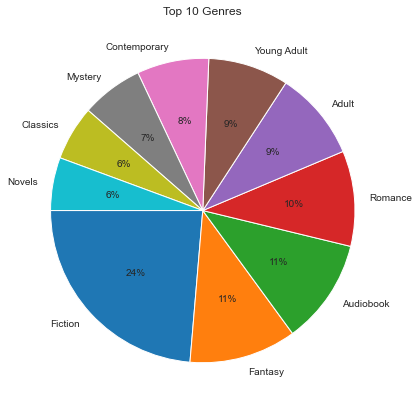

In [19]:
plt.figure(figsize=(15,7))
plt.title("Top 10 Genres")
plt.pie(sizes, labels=labels, wedgeprops= {'edgecolor':'white'}, autopct='%1.0f%%', startangle=180);


In [20]:
#list of different genres
fiction_genre = ['Fiction', 'Realistic Fiction', 'Adult Fiction', 'Fan Fiction', 'Novels', 'Supernatural', 'Recreation']
fantasy_genre = ['Fantasy', 'Urban Fantasy', 'Lds Fiction', 'American Fiction', 'High Fantasy', 'Adolescence', 'Faith', 'Epic Fantasy', 'Magic', 'Magical Realism', 'High Fantasy', 'Wizards', 'Epic Fantasy', 'Fairy Tale', 'Quest', 'Fantasy Fiction', 'Vampires']
self_genre= ['Self Help', 'Taoism']
thriller_genre = ['Thriller', 'Paranormal Mystery', 'Mystery Thriller', 'Detective', 'Adventure', 'Psychological Thriller', 'Suspense']
romance_genre = ['Romance', 'Historical Romance', 'Time Travel Romance', 'Erotic Historical Romance', 'Category Romance', 'Victorian Romance', 'Love', 'Contemporary Romance', 'M F Romance']
war_genre = ['Action', 'Civil War', 'War', 'World War II', 'Soldiers', 'Zombies']
tech_genre = ['Personal Finance', 'Taxation', 'Banking', 'Programming', 'Software', 'Coding', 'Internet','Computer Science', 'Business', 'Technology']
env_genre =['Global Warming', 'Climate Change Fiction', 'Environment', 'Sustainability']
health_genre = ['Health', 'Psychiatry', 'Psychology']
politics_genre =['International Relations', 'Politics']
comedy_genre =['Comics', 'Jokes', 'Comedy', 'Humor']
literature_genre = ['Literature']
horror_genre =['Erotic Horror', 'Ghost Stories', 'Horror']
nonfiction_genre = ['Logic', 'Philosophy','Nonfiction']
erotic_genre =['Erotica', 'Erotic Historical Romance', 'Erotic Paranormal Romance']            
science_genre =['Science Fiction']

In [21]:
df_test_genre = df[df['numRatings'] > 20000]

In [22]:
df_test_genre.genres = df_test_genre.genres.apply(lambda x: x.replace('[', '').replace(']', '').replace("'", '').replace(",","").strip().split())

/Users/thor/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
def check_genres(index):
    return {
        'fiction' : list(np.isin(index, fiction_genre)),
        'fantasy' : list(np.isin(index, fantasy_genre)),
        'self' : list(np.isin(index,self_genre)),
        'thriller' : list(np.isin(index,thriller_genre)),
        'romance' : list(np.isin(index,romance_genre)),
        'war' : list(np.isin(index,war_genre)),
        'tech' : list(np.isin(index,tech_genre)),
        'environment' : list(np.isin(index,env_genre)),
        'health' : list(np.isin(index,health_genre)),
        'politics' : list(np.isin(index,politics_genre)),
        'comedy' : list(np.isin(index,comedy_genre)),
        'literature' : list(np.isin(index,literature_genre)),
        'horror' : list(np.isin(index,horror_genre)),
        'nonfiction' : list(np.isin(index,nonfiction_genre)),
        'erotic' : list(np.isin(index,erotic_genre)),
        'science' : list(np.isin(index,science_genre))
    }

In [24]:
df_test_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7483 entries, 0 to 52401
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bookId          7483 non-null   object 
 1   title           7483 non-null   object 
 2   author          7483 non-null   object 
 3   rating          7483 non-null   float64
 4   description     7461 non-null   object 
 5   language        7371 non-null   object 
 6   isbn            7483 non-null   object 
 7   genres          7483 non-null   object 
 8   characters      7483 non-null   object 
 9   bookFormat      7459 non-null   object 
 10  pages           7460 non-null   object 
 11  publishDate     7473 non-null   object 
 12  numRatings      7483 non-null   int64  
 13  ratingsByStars  7483 non-null   object 
 14  likedPercent    7483 non-null   float64
 15  coverImg        7481 non-null   object 
dtypes: float64(2), int64(1), object(13)
memory usage: 993.8+ KB


In [25]:
for index, value in df_test_genre.genres.iteritems():
    percentage_presence = {}
    notes = []
    present_values = check_genres(value)
    for key, value in present_values.items():
        percentage_presence.update({key : value.count(True)/len(value)})
        notes.append(value.count(True)/len(value))
    for k, v in percentage_presence.items():
        if max(notes) == v:
            genre = k
    df_test_genre.genres.at[index] = genre

/Users/thor/opt/anaconda3/lib/python3.9/site-packages/pandas/core/series.py:1169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(loc, value)


In [26]:
final_genre_count = df_test_genre.genres.value_counts()

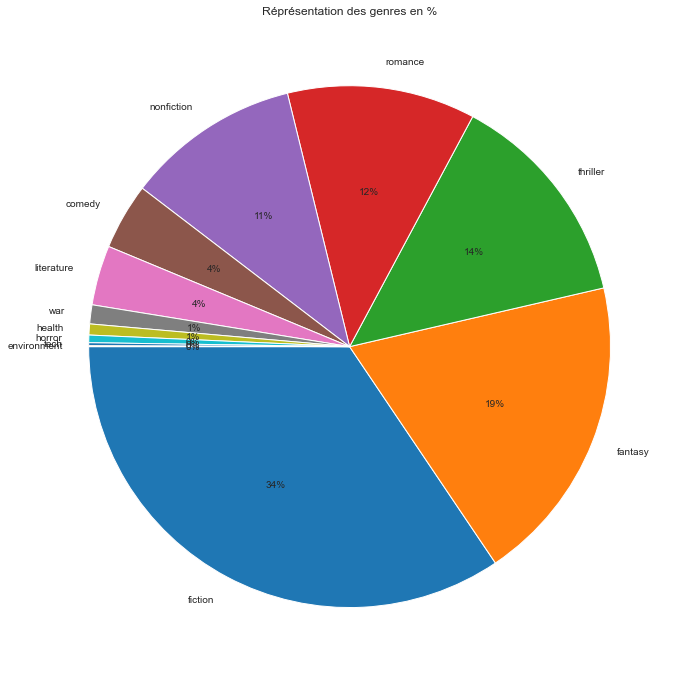

In [27]:
plt.figure(figsize=(20,12))
plt.title("Réprésentation des genres en %")
plt.pie(final_genre_count, labels=final_genre_count.index, wedgeprops= {'edgecolor':'white'}, autopct='%1.0f%%', startangle=180);


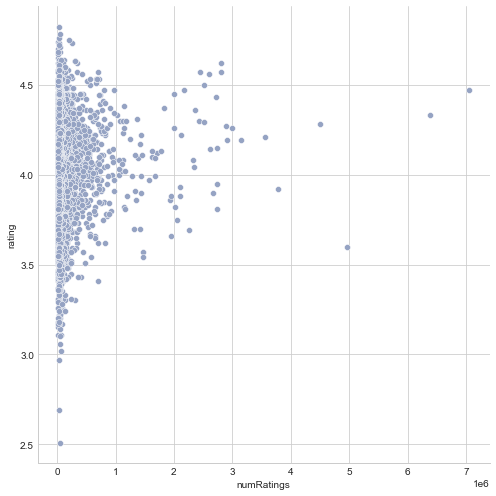

In [28]:
ax = sns.relplot(data=df_test_genre,
                 x="numRatings",
                 y="rating",
                 color = '#95a3c3',
                 sizes=(400, 600), 
                 height=7, 
                 marker='o')

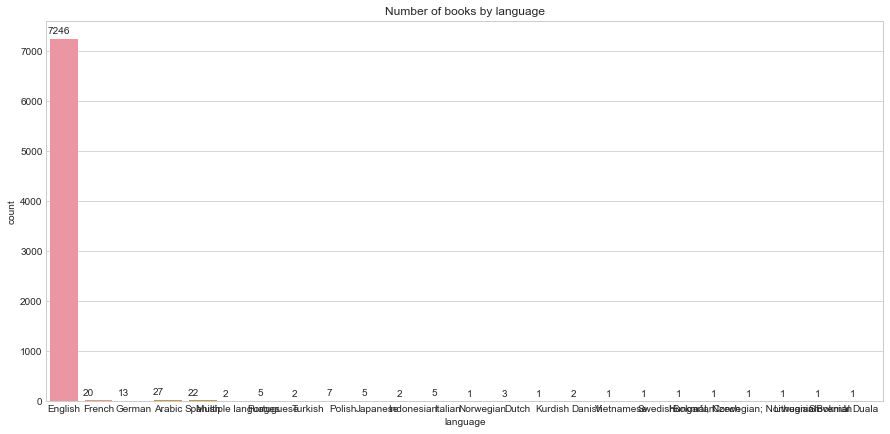

In [29]:
plt.figure(figsize=(15, 7))
plt.title('Number of books by language')
ax = sns.countplot(x='language', data=df_test_genre)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.05, p.get_height()+100))

In [30]:
only_english_books = df_test_genre[df_test_genre['language'] == 'English']

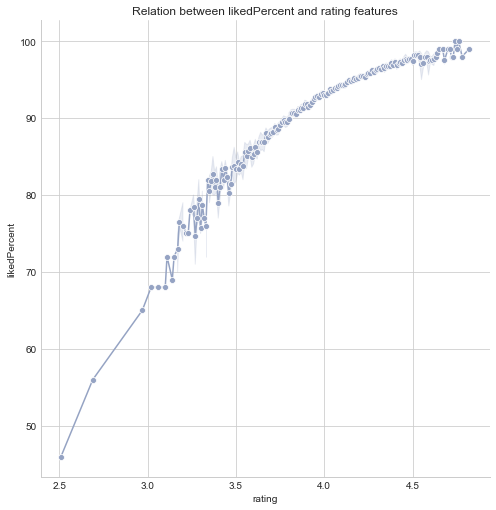

In [31]:
ax = sns.relplot(data=only_english_books,
                 x="rating",
                 y="likedPercent",
                 color = '#95a3c3',
                 sizes=(400, 600), 
                 height=7, 
                 marker='o', kind="line").set(title='Relation between likedPercent and rating features')

In [32]:
only_english_books.dtypes

bookId             object
title              object
author             object
rating            float64
description        object
language           object
isbn               object
genres             object
characters         object
bookFormat         object
pages              object
publishDate        object
numRatings          int64
ratingsByStars     object
likedPercent      float64
coverImg           object
dtype: object

/Users/thor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Average rating')

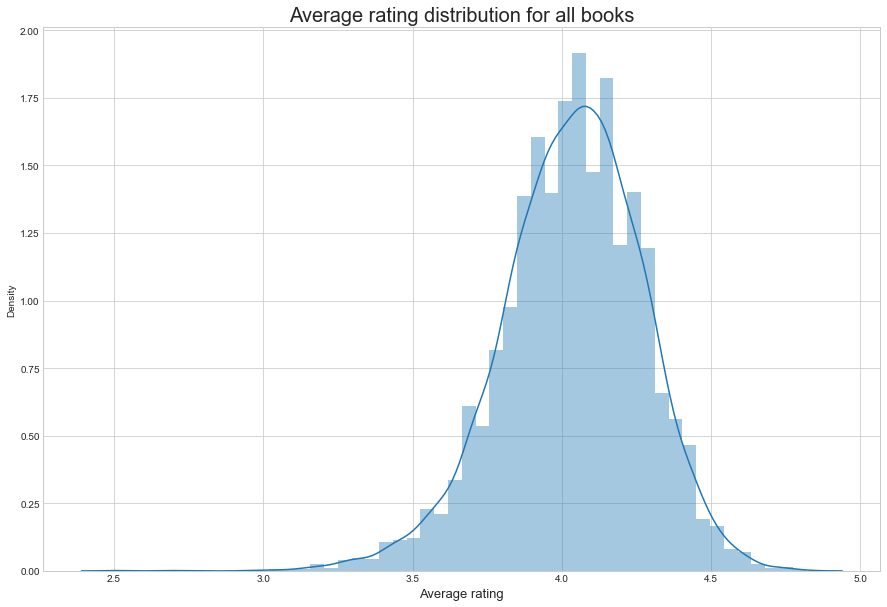

In [33]:
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(only_english_books['rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

It almost follow gaussian distributions curve. so, it is very good for model training.

In [34]:
threshold = 0.7
#Dropping columns with missing value rate higher than threshold
only_english_books = only_english_books[only_english_books.columns[only_english_books.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
only_english_books = only_english_books.loc[only_english_books.isnull().mean(axis=1) < threshold]


In [35]:
only_english_books = only_english_books.drop(['bookId'], axis=1)
only_english_books = only_english_books.reset_index(drop=True)

In [36]:
only_english_books.dtypes

title              object
author             object
rating            float64
description        object
language           object
isbn               object
genres             object
characters         object
bookFormat         object
pages              object
publishDate        object
numRatings          int64
ratingsByStars     object
likedPercent      float64
coverImg           object
dtype: object

<AxesSubplot:>

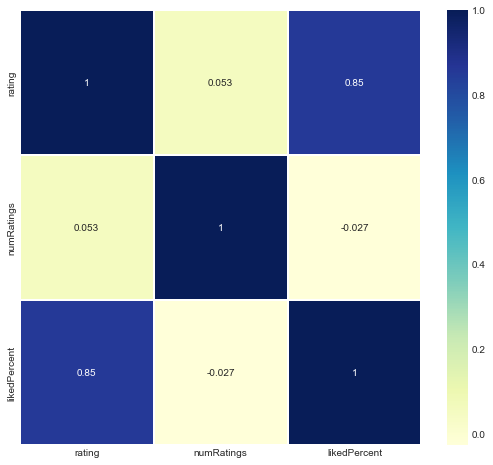

In [37]:
corrmat = only_english_books.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True) 


In [38]:
df_copy =only_english_books.copy()

In [39]:
df_copy.loc[ (df_copy['rating'] >= 0) & (df_copy['rating'] <= 1), 'rating_between'] = "between 0 and 1"
df_copy.loc[ (df_copy['rating'] > 1) & (df_copy['rating'] <= 2), 'rating_between'] = "between 1 and 2"
df_copy.loc[ (df_copy['rating'] > 2) & (df_copy['rating'] <= 3), 'rating_between'] = "between 2 and 3"
df_copy.loc[ (df_copy['rating'] > 3) & (df_copy['rating'] <= 4), 'rating_between'] = "between 3 and 4"
df_copy.loc[ (df_copy['rating'] > 4) & (df_copy['rating'] <= 5), 'rating_between'] = "between 4 and 5"


In [40]:
df_copy

,title,author,rating,description,language,isbn,genres,characters,bookFormat,pages,publishDate,numRatings,ratingsByStars,likedPercent,coverImg,rating_between
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,fiction,"['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,374,09/14/08,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,https://i.gr-assets.com/images/S/compressed.ph...,between 4 and 5
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,English,9780439358071,fantasy,"['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,870,09/28/04,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,https://i.gr-assets.com/images/S/compressed.ph...,between 4 and 5
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,fiction,"['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,324,05/23/06,4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,https://i.gr-assets.com/images/S/compressed.ph...,between 4 and 5
3,Pride and Prejudice,Jane Austen,4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,fiction,"['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,279,10/10/00,2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,https://i.gr-assets.com/images/S/compressed.ph...,between 4 and 5
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,fantasy,"['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,501,09/06/06,4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,https://i.gr-assets.com/images/S/compressed.ph...,between 3 and 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7241,The Complete Adventures of Curious George,Margret Rey,4.23,“This is George. He lived in Africa. He was a ...,English,9780618164417,comedy,[],Hardcover,432,September 25th 2001,44034,"['22832', '11592', '7230', '1642', '738']",95.0,https://i.gr-assets.com/images/S/compressed.ph...,between 4 and 5
7242,Shakespeare's Landlord,Charlaine Harris (Goodreads Author),3.76,"Welcome to Shakespeare, Arkansas. Lily Bard ca...",English,9780425206867,thriller,"['Lily Bard', 'Marshall Sedaka', 'Pardon Alby'...",Paperback,216,November 1st 2005,25143,"['6232', '9287', '7558', '1576', '490']",92.0,https://i.gr-assets.com/images/S/compressed.ph...,between 3 and 4
7243,When We Were Orphans,Kazuo Ishiguro,3.50,"From the Booker Prize-winning, bestselling aut...",English,9780375724404,fiction,"['Jennifer', 'Akira', 'Christopher Banks', 'Ja...",Paperback,336,October 30th 2001,27511,"['3939', '10059', '9957', '2922', '634']",87.0,https://i.gr-assets.com/images/S/compressed.ph...,between 3 and 4
7244,See Jane Score,Rachel Gibson (Goodreads Author),4.04,\n This is Jane\nA little subdued. A little s...,English,9780060009243,romance,"['Jane Alcott', 'Luc Martineau']",Mass Market Paperback,363,January 28th 2003,24431,"['8678', '9530', '5018', '964', '241']",95.0,https://i.gr-assets.com/images/S/compressed.ph...,between 4 and 5


In [41]:
rating_df = pd.get_dummies(df_copy['rating_between'])
rating_df.head()

,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0


In [42]:
genre_df_dummies = pd.get_dummies(df_copy['genres'])

In [43]:
features = pd.concat([genre_df_dummies, rating_df, df_copy['rating'], df_copy['numRatings'], df_copy['likedPercent']], axis=1)
features.head()

,comedy,environment,fantasy,fiction,health,horror,literature,nonfiction,romance,tech,thriller,war,between 2 and 3,between 3 and 4,between 4 and 5,rating,numRatings,likedPercent
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,4.33,6376780,96.0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4.50,2507623,98.0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,4.28,4501075,95.0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,4.26,2998241,94.0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3.60,4964519,78.0


## Model Selection

In [44]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [45]:
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [46]:
model = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [68]:
dist.shape

array([[0.00000000e+00, 2.68388462e-01, 4.09218912e-01, ...,
        5.62711497e-01, 5.89368522e-01, 6.03580102e-01],
       [0.00000000e+00, 3.18961755e-02, 3.42169927e-02, ...,
        8.50270015e-02, 1.26718618e-01, 1.38767979e-01],
       [0.00000000e+00, 1.43434182e-01, 1.98336906e-01, ...,
        2.95511104e-01, 3.25539520e-01, 3.47011798e-01],
       ...,
       [0.00000000e+00, 1.77211089e-02, 1.85642220e-02, ...,
        1.94767164e-02, 1.95411509e-02, 2.04558374e-02],
       [0.00000000e+00, 3.48155480e-04, 4.33003506e-03, ...,
        8.65817130e-03, 8.65978000e-03, 8.66300677e-03],
       [0.00000000e+00, 3.12130565e-03, 4.45854833e-03, ...,
        7.65870917e-03, 8.66026707e-03, 8.66159630e-03]])

In [59]:
idlist.shape

(7246, 10)

In [65]:
d = {'Index': idlist, 'Distance': dist}


In [67]:
test = pd.DataFrame(d, index=[0])

ValueError: Data must be 1-dimensional

In [64]:
test

,Index,Distance
0,"[[0, 2, 10, 80, 3, 21, 217, 59, 319, 30], [1, ...","[[0.0, 0.26838846224930357, 0.4092189119508854..."


In [47]:
def book_recommendation_engine(book_name):
    book_list_name = []
    book_
    book_id = df_copy[df_copy['title'].str.match(book_name, case=False)].index
    book_id = book_id[0]
#     print('book_id', book_id)
    for newid in idlist[book_id]:
#         print(newid)
        book_list_name.append(df_copy.loc[newid].title)
#         print(new_data.loc[newid].title)
    return book_list_name

In [48]:
book_list_name = book_recommendation_engine('Harry potter')
book_list_name

['Harry Potter and the Order of the Phoenix',
 'Harry Potter and the Half-Blood Prince',
 'Harry Potter and the Goblet of Fire',
 'Harry Potter and the Chamber of Secrets',
 'Harry Potter and the Prisoner of Azkaban',
 'Harry Potter and the Deathly Hallows',
 'A Game of Thrones',
 'The Fellowship of the Ring',
 'The Hobbit, or There and Back Again',
 'The Lightning Thief']

In [49]:
df_copy[df_copy['title'].str.match('Harry potter', case=False)].index

Int64Index([1, 32, 71, 93, 103, 105, 126, 399, 1251, 2012, 2928, 4555, 4688,
            6480, 6724],
           dtype='int64')